<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-0.000322,220.230846,220.231146,-0.000300
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.000183,213.358327,213.358062,0.000265
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-0.004792,176.439332,176.444395,-0.005063
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,0.000482,270.231635,270.231171,0.000465
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-0.000679,236.458005,236.459100,-0.001095
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,0.000429,267.724867,267.724513,0.000354
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.000175,257.885530,257.885337,0.000193
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,0.002165,271.219816,271.218106,0.001711
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,0.001639,248.744703,248.743769,0.000934


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-0.000322,220.230846,220.231146,-0.000300
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.000183,213.358327,213.358062,0.000265
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-0.004792,176.439332,176.444395,-0.005063
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,0.000482,270.231635,270.231171,0.000465
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-0.000679,236.458005,236.459100,-0.001095
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,0.000429,267.724867,267.724513,0.000354
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.000175,257.885530,257.885337,0.000193
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,0.002165,271.219816,271.218106,0.001711
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,0.001639,248.744703,248.743769,0.000934


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.500502,63.717616,22.076127,71.936923,-0.000322,220.230846,220.231146,-0.000300
1,0.0,1.0,70.427858,55.690492,35.325084,41.914709,0.000183,213.358327,213.358062,0.000265
2,0.0,2.0,73.458656,22.899774,40.373637,29.712057,-0.004792,176.439332,176.444395,-0.005063
3,0.0,3.0,45.076725,61.155039,79.799378,74.200011,0.000482,270.231635,270.231171,0.000465
4,0.0,4.0,24.393520,41.813749,63.638355,96.613061,-0.000679,236.458005,236.459100,-0.001095
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.376510,54.024279,73.504585,75.819064,0.000429,267.724867,267.724513,0.000354
249996,999.0,246.0,72.687231,37.296268,91.549318,46.352887,-0.000175,257.885530,257.885337,0.000193
249997,999.0,247.0,76.548069,68.956671,49.307235,66.405676,0.002165,271.219816,271.218106,0.001711
249998,999.0,248.0,94.246148,56.488447,32.839337,55.169132,0.001639,248.744703,248.743769,0.000934


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.500502  63.717616  22.076127  71.936923 -0.000322  220.230846   
      1.0    70.427858  55.690492  35.325084  41.914709  0.000183  213.358327   
      2.0    73.458656  22.899774  40.373637  29.712057 -0.004792  176.439332   
      3.0    45.076725  61.155039  79.799378  74.200011  0.000482  270.231635   
      4.0    24.393520  41.813749  63.638355  96.613061 -0.000679  236.458005   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  54.376510  54.024279  73.504585  75.819064  0.000429  267.724867   
      246.0  72.687231  37.296268  91.549318  46.352887 -0.000175  257.885530   
      247.0  76.548069  68.956671  49.307235  66.405676  0.002165  271.219816   
      248.0  94.246148  56.488447  32.839337  55.169132  0.001639  248.744703   
      249.0  33.964959  53.663217  73.017981  22.059349 -0.001897  192.703608   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.231146 -0.000300  
      1.0    213.358062  0.000265  
      2.0    176.444395 -0.005063  
      3.0    270.231171  0.000465  
      4.0    236.459100 -0.001095  
...                 ...       ...  
999.0 245.0  267.724513  0.000354  
      246.0  257.885337  0.000193  
      247.0  271.218106  0.001711  
      248.0  248.743769  0.000934  
      249.0  192.704746 -0.001138  

[250000 rows x 8 columns]

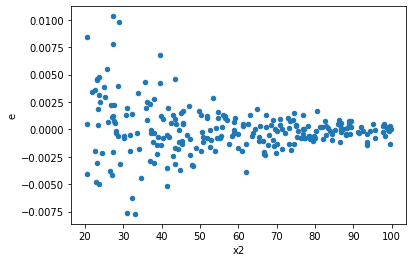

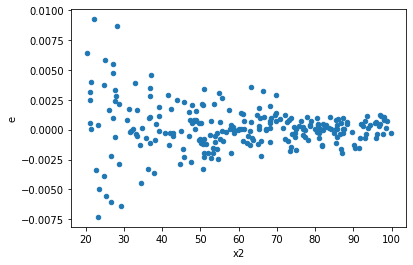

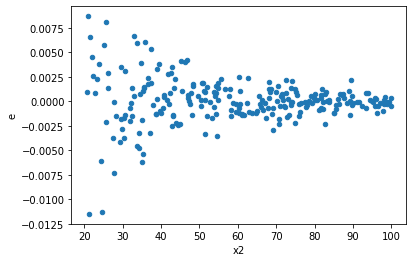

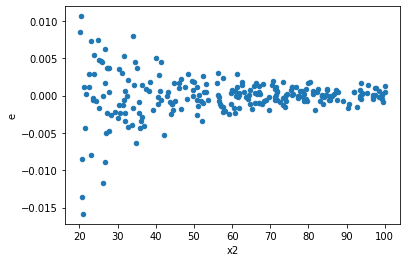

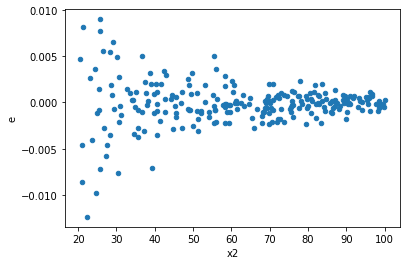

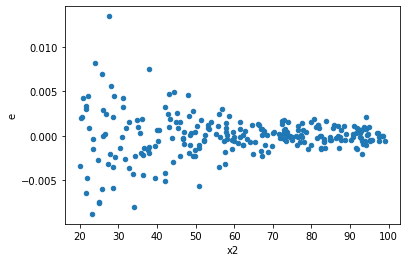

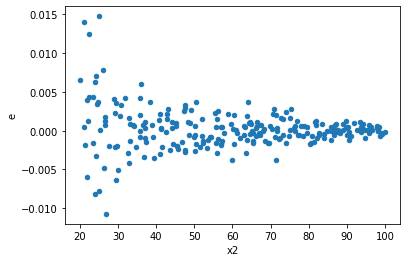

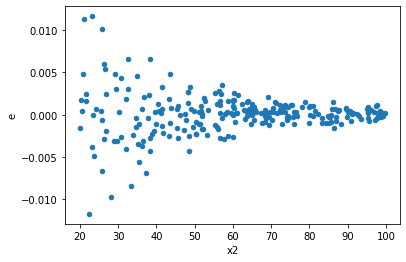

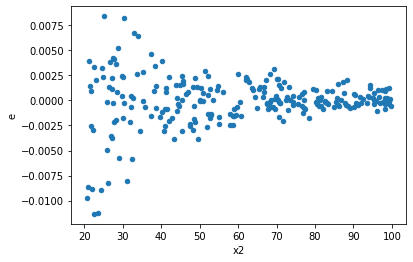

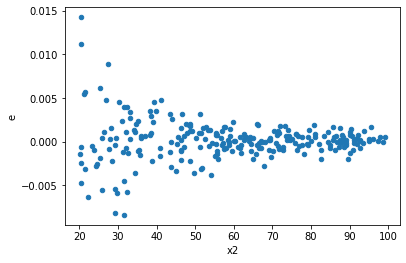

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
93.0,96.0,96.0,0.0007382462597539277,0.000807985878315253,7.69006520577008e-06,8.416519565783885e-06,1.0944666060137858,0.6592187359263684,0.6703906320368158,0.3296093679631842,Reject001=1 : Homoscedasticity
147.0,96.0,96.0,0.00046383545971500294,0.0007610887302916266,4.831619372031281e-06,7.928007607204444e-06,1.6408593054943807,0.01605776969564454,0.9919711151521777,0.00802888484782227,Reject001=1 : Homoscedasticity
355.0,96.0,96.0,0.0007963148359209087,0.0008051929955131008,8.294946207509465e-06,8.3874270365948e-06,1.011149057121264,0.9567954441378783,0.5216022779310608,0.47839772206893916,Reject001=1 : Homoscedasticity
447.0,96.0,96.0,0.0010165785045054365,0.0010965270506914028,1.0589359421931631e-05,1.1422156778035446e-05,1.0786447341072405,0.7114789868413696,0.6442605065793152,0.3557394934206848,Reject001=1 : Homoscedasticity
728.0,96.0,96.0,0.0007960320439390887,0.0008399839720337258,8.29200045769884e-06,8.749833042017978e-06,1.055213767371908,0.7928687929575493,0.6035656035212253,0.39643439647877465,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.0008299107062670389,0.0002653723546636129,8.644903190281654e-06,2.7642953610793013e-06,0.31976012920385743,5.609589744186584e-08,Reject001=0 : Heteroscedasticity
1.0,96.0,96.0,0.0005528027638482598,0.00018925523734640315,5.758362123419373e-06,1.971408722358366e-06,0.3423558088402616,3.0549209297830896e-07,Reject001=0 : Heteroscedasticity
2.0,96.0,96.0,0.0008286678543362777,0.00036418895888821307,8.631956816002892e-06,3.793634988418886e-06,0.43948725292344126,7.406583438677375e-05,Reject001=0 : Heteroscedasticity
3.0,96.0,96.0,0.0011497517084728256,0.00041680960246405594,1.1976580296591934e-05,4.341766692333916e-06,0.36252140300594926,1.188179094494948e-06,Reject001=0 : Heteroscedasticity
4.0,96.0,96.0,0.0007787543633393219,0.00027661556431372966,8.112024618117936e-06,2.8814121282680173e-06,0.35520258676637634,7.371457371672812e-07,Reject001=0 : Heteroscedasticity
5.0,96.0,96.0,0.0009211189607944922,0.0002862793823174847,9.594989174942628e-06,2.9820768991404655e-06,0.3107952333003332,2.705444841990973e-08,Reject001=0 : Heteroscedasticity
6.0,96.0,96.0,0.0013605344254693924,0.0002195204525164958,1.4172233598639504e-05,2.2866713803801645e-06,0.16134869387135128,4.811556379242882e-17,Reject001=0 : Heteroscedasticity
7.0,96.0,96.0,0.000912951600799252,0.0002885890824150114,9.509912508325542e-06,3.006136275156369e-06,0.31610556590553474,4.184318682541892e-08,Reject001=0 : Heteroscedasticity
8.0,96.0,96.0,0.001017252319479211,0.000189015257753599,1.0596378327908448e-05,1.9689089349333226e-06,0.18580961098261892,5.9819230257476715e-15,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    952
Reject001=1 : Homoscedasticity       48
Name: Result_test, dtype: int64